In [24]:
import os

import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.metrics import BinaryCrossentropy
from tensorflow.keras import regularizers

In [40]:
df: pd.DataFrame = pd.read_csv(r"C:\Users\krish\Downloads\The_Cancer_data_1500_V2.csv")  #https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [27]:
x = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, stratify=y, random_state=137)

In [29]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

In [30]:
def make_model(_optimizer, _i) -> keras.Sequential:
    model = keras.Sequential(name=f'cancer_{_i}')
    model.add(keras.Input((8,)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=_optimizer,
        metrics=['accuracy']
    )

    model.summary()
    return model

In [31]:
models = []
for i, optimizer in enumerate(optimizers):
    model = make_model(optimizer, i)
    models.append(model)

Model: "cancer_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 256)               2304      
                                                                 
 dense_46 (Dense)            (None, 256)               65792     
                                                                 
 dense_47 (Dense)            (None, 1)                 257       
                                                                 
Total params: 68353 (267.00 KB)
Trainable params: 68353 (267.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "cancer_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 256)               2304      
                                                                 
 d

In [32]:
histories = []
for i, model in enumerate(models):
    histories.append(model.fit(xtrain, ytrain, epochs=50, batch_size=8).history)
    model.save(f'saved/Q1/diabetes_{i}.h5')

Epoch 1/50
160/160 [==============================] - 1s 2ms/step - loss: 3.8304 - accuracy: 0.3710
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 2.8166 - accuracy: 0.3710
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 1.8312 - accuracy: 0.3710
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 1.1012 - accuracy: 0.3843
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.5020
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.7238 - accuracy: 0.5757
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.5788
Epoch 8/50
160/160 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.5922
Epoch 9/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5922
Epoch 10/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5929

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


160/160 [==============================] - 1s 2ms/step - loss: 0.7161 - accuracy: 0.6173
Epoch 2/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6291 - accuracy: 0.6518
Epoch 3/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.6659
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.6541
Epoch 5/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.6784
Epoch 6/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6059 - accuracy: 0.6729
Epoch 7/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6012 - accuracy: 0.6714
Epoch 8/50
160/160 [==============================] - 0s 1ms/step - loss: 0.5963 - accuracy: 0.6933
Epoch 9/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.6816
Epoch 10/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.6761
Epoch 11/5

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


160/160 [==============================] - 1s 2ms/step - loss: 1.1266 - accuracy: 0.5749
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6502
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7051
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7294
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7192
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7498
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7765
Epoch 8/50
160/160 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7804
Epoch 9/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7827
Epoch 10/50
160/160 [==============================] - 0s 981us/step - loss: 0.4607 - accuracy: 0.7890
Epoch 11

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


160/160 [==============================] - 1s 2ms/step - loss: 1.0337 - accuracy: 0.5875
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.6259
Epoch 3/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.6800
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.7098
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7247
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7412
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7600
Epoch 8/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7647
Epoch 9/50
160/160 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.7694
Epoch 10/50
160/160 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.7788
Epoch 11/5

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


160/160 [==============================] - 1s 2ms/step - loss: 0.8735 - accuracy: 0.6047
Epoch 2/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6353
Epoch 3/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.6431
Epoch 4/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.6314
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6525
Epoch 6/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6276 - accuracy: 0.6596
Epoch 7/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.6416
Epoch 8/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.6722
Epoch 9/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6241 - accuracy: 0.6573
Epoch 10/50
160/160 [==============================] - 0s 1ms/step - loss: 0.6170 - accuracy: 0.6588
Epoch 11/5

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
histories[0].keys()

dict_keys(['loss', 'accuracy'])

In [34]:
acc_scores = []
hs = []
for i, model in enumerate(models):
    ypred = model.predict(xtest)
    print(ypred.shape)
    for j in range(len(ypred)):
        if ypred[j] < 0.5: ypred[j] = 0
        else: ypred[j] = 1
    print(ypred.shape)

    acc_scores.append(accuracy_score(ytest, ypred))

    hs.append({
        'acc': histories[i]['accuracy'],
        'loss': histories[i]['loss']
    })

8/8 [==============================] - 0s 1ms/step
(225, 1)
(225, 1)
8/8 [==============================] - 0s 2ms/step
(225, 1)
(225, 1)
8/8 [==============================] - 0s 1ms/step
(225, 1)
(225, 1)
8/8 [==============================] - 0s 1ms/step
(225, 1)
(225, 1)
8/8 [==============================] - 0s 1ms/step
(225, 1)
(225, 1)


In [35]:
for i, optimizer in enumerate(optimizers):
    print(f'{optimizer}: {acc_scores[i]:.2f}')

Adadelta: 0.62
Adagrad: 0.70
Adam: 0.88
RMSprop: 0.88
SGD: 0.63


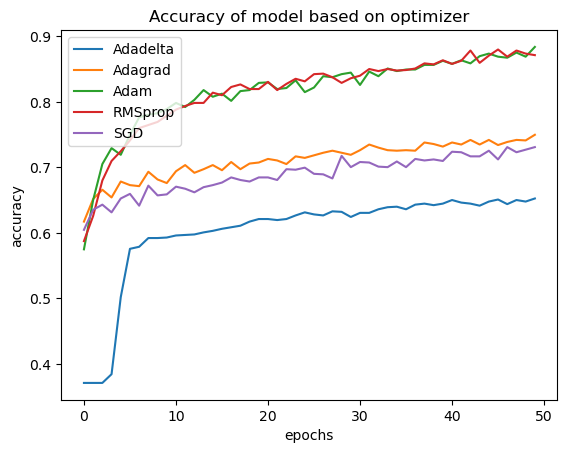

In [36]:
for i in range(len(hs)):
    plt.plot(hs[i]['acc'])
    plt.title('Accuracy of model based on optimizer')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')

plt.legend(optimizers, loc='upper left')
plt.show()

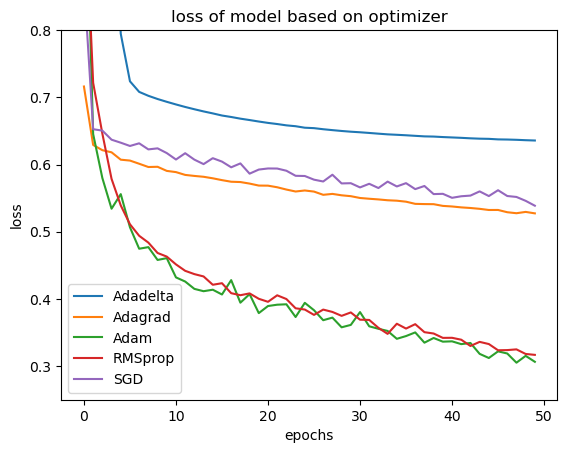

In [39]:
for i in range(len(hs)):
    plt.plot(hs[i]['loss'])
    plt.title('loss of model based on optimizer')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.ylim([0.25, 0.80])

plt.legend(optimizers, loc='lower left')
plt.show()